# What economic indicators best predict happiness globally?



### Introduction

In the 2024 UK General Election, the winning Labour party’s primary objective in its manifesto was economic growth, arguing that sustained growth is essential to improve prosperity and living standards (Weston, 2025). This follows a general trend in the post-war age of neoliberalism, where constant growth is valued and prioritised above all else (Raworth, 2017) – a marked change from the previous century where an economy was judged on living standards. This presents multiple long-term issues, with Raworth arguing that pursuing continual economic growth will eventually cause catastrophic damage to the planet, having a huge impact on human and non-human life. 

If GDP growth is bad for us in the long run, that means that in order to continue being economically active, our economic goals must shift to metrics that reflect the wellbeing of the people and the planet. The World Happiness Report is an annual publication that contains worldwide rankings of national happiness (World Happiness Report, 2025), and its “Gross National Happiness” index has been considered a potential alternative to GDP as a single common metric by which to to measure a nation’s growth/improvement (Campbell, 2012).

This project examines the relationship between GDP and five alternative national economic indicators, and reported levels of happiness according to the World Happiness Report. Its aim is to assess whether the economic metrics that currently dominate policy-making are closely aligned with citizen wellbeing, or whether alternative and less-prominent indicators show a stronger association with national happiness. 

To investigate this question, we will be conducting multiple analyses, including multiple linear regression and mixed effects models. The five alternative national economic indicators are predictors within these models, and were chosen as they take a more experience-based view of a national economy. These predictors are GDP per capita, GDP based on purchasing power parity, % population that lives in an urban area, value added in service actor, and HDI (human development index). 

### Data collection and preprocessing

#### Data source


We obtained the economic data from theglobaleconomy.com, which provides a broad selection of global economic data ranging from 1960-2024, from 200 countries. This data is mostly obtained from the world bank, and appears to be a reliable source for large amounts of such information.

The happiness data was originally collected from https://www.worldhappiness.report/data-sharing/ , but was then obtained from theglobaleconomy.com along with the rest of the data. The World Happiness Report is collated from data from the Gallup world poll, and the data on individual happiness is collected through this question: 

*Please imagine a ladder with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?*


add description of code

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import os

files = os.listdir("data/")
merged = None

for filename in files:
    _df = pd.read_csv("data/"+filename)
    if merged is None:
        merged = _df
    else:
        merged = pd.merge(merged, _df, on=["Country", "Year", "Code", "ContinentCode"], how="outer")
merged.head(3)

,Country,Code,ContinentCode,Year,Internet users percent of population,Broadband internet subscribers in thousands,Fixed broadband internet subscribers per 100 people,Mobile phone subscribers in millions,Mobile phone subscribers per 100 people,Mobile network coverage percent of the population,...,Healthcare price index world average = 100,Transport prices world average = 100,Hotel and restaurant price index world average = 100,Vehicle prices world average = 100,Communication price index world average = 100,Recreation and culture price index world average = 100,Education service price index world average = 100,Machinery and equipment prices world average = 100,Short-term debt percent of total external debt,Short-term external debt percent of international reserves
0,Afghanistan,AFG,AS,1960,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,AS,1961,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,AS,1962,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


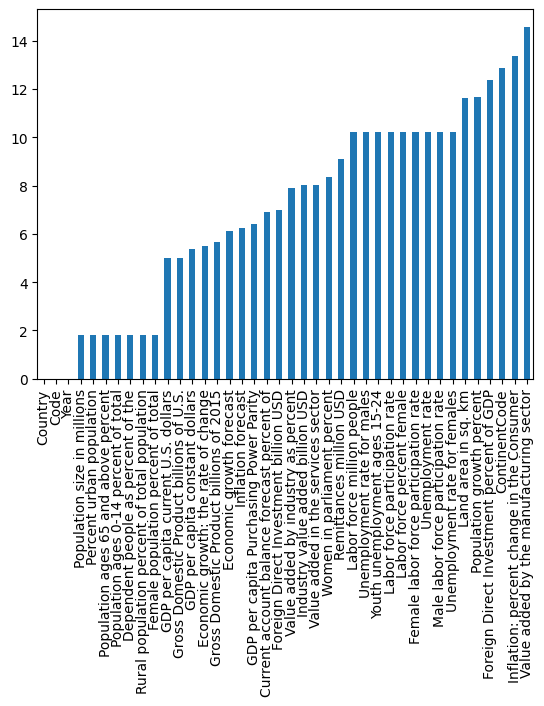

In [16]:
df = merged[(merged["Year"] >= 2015) & (merged["Year"] <= 2024)]
bycol = df.apply(lambda x: round((x.isnull().sum().sum()/x.size)*100, 2)).sort_values()
bycol[:40].plot(kind="bar")

ticks, labels = plt.xticks()
newlabels = [" ".join(label.get_text().split()[:6]) for label in labels]
plt.xticks(ticks, newlabels)
plt.show()

by country


/var/folders/px/b_j3wj7x1c3fccm_vc5scmgr0000gn/T/ipykernel_95394/3822830018.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bycol = df.groupby("Country").apply(lambda x: round((x.isnull().sum().sum()/x.size)*100, 2)).sort_values()


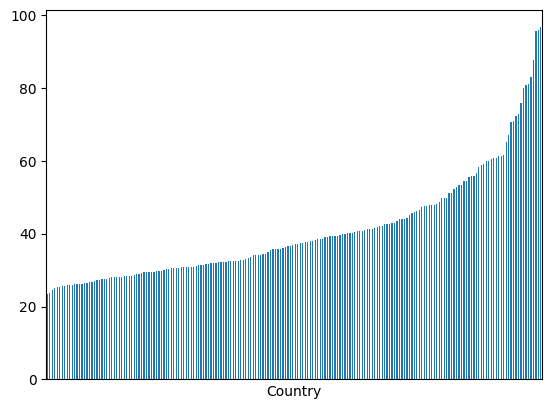

In [17]:
print("by country")
bycol = df.groupby("Country").apply(lambda x: round((x.isnull().sum().sum()/x.size)*100, 2)).sort_values()
bycol.plot(kind="bar")

ticks, labels = plt.xticks()
#newlabels = [" ".join(label.get_text().split()[:6]) for label in labels]
plt.xticks([], [])
plt.show()

by year


/var/folders/px/b_j3wj7x1c3fccm_vc5scmgr0000gn/T/ipykernel_95394/1670473414.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bycol = df.groupby("Year").apply(lambda x: round((x.isnull().sum().sum()/x.size)*100, 2)) #.sort_values()


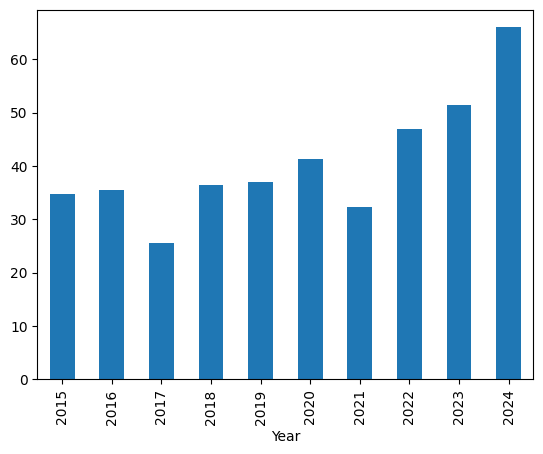

In [19]:
print("by year")
bycol = df.groupby("Year").apply(lambda x: round((x.isnull().sum().sum()/x.size)*100, 2)) #.sort_values()
bycol.plot(kind="bar")

ticks, labels = plt.xticks()
plt.show()

In [20]:
rename_dict = {"Happiness Index 0 (unhappy) - 10 (happy)": "happiness",
               "Gross Domestic Product billions of U.S. dollars": "GDP",
                "GDP per capita current U.S. dollars": "GDP_per_capita",
                "GDP per capita Purchasing Power Parity": "GDPPPP"}
df = df.rename(rename_dict, axis=1)
df2018 = df[df["Year"] == 2018]

df2018.head(3)


,Country,Code,ContinentCode,Year,Internet users percent of population,Broadband internet subscribers in thousands,Fixed broadband internet subscribers per 100 people,Mobile phone subscribers in millions,Mobile phone subscribers per 100 people,Mobile network coverage percent of the population,...,Healthcare price index world average = 100,Transport prices world average = 100,Hotel and restaurant price index world average = 100,Vehicle prices world average = 100,Communication price index world average = 100,Recreation and culture price index world average = 100,Education service price index world average = 100,Machinery and equipment prices world average = 100,Short-term debt percent of total external debt,Short-term external debt percent of international reserves
58,Afghanistan,AFG,AS,2018,16.8,16.0,0.04,21.98,59.81,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.19,5.29
123,Albania,ALB,EU,2018,65.4,362.0,12.51,2.71,93.80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.48,23.49
194,Algeria,DZA,AF,2018,49.0,3067.0,7.22,47.15,110.94,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.61,2.65
